In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_data = pd.merge(mouse_metadata, study_results, how ='right')

# Display the data table for preview
Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
Combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice = Combined_data['Mouse ID'].value_counts()
total_mice =len(mice)
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = Combined_data.loc[Combined_data['Mouse ID'] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

D_regimen_summary_stats = clean_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

D_regimen_summary_stats.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev",
    "Tumor Volume Std. Err"
]

print(D_regimen_summary_stats)

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

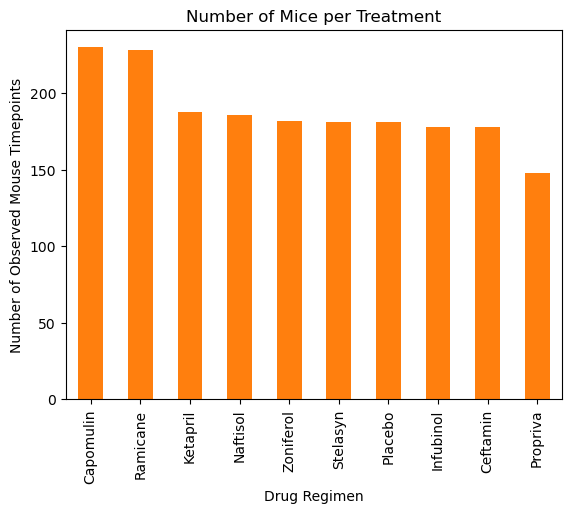

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df['Drug Regimen'].value_counts()

#Create bar plot and labels and title
plot_pandas = mice_count.plot.bar(color = 'tab:orange')
plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of Observed Mouse Timepoints")
plt.title ("Number of Mice per Treatment")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

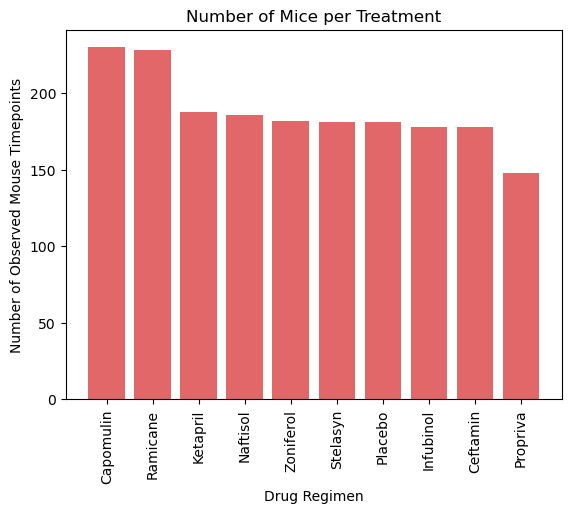

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

#Create Pyplot bar plot and set labels, tichks and title
plt.bar(x_axis, y_axis, color ='tab:red', alpha=0.70, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")
plt.show

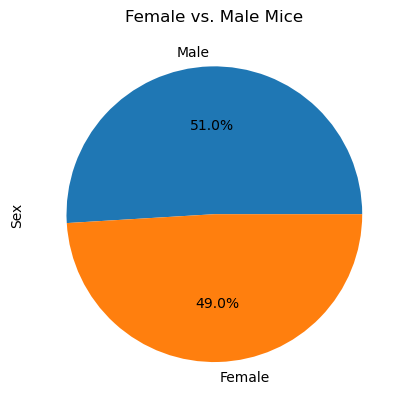

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df['Sex'].value_counts()
gender_data.plot.pie(autopct = "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

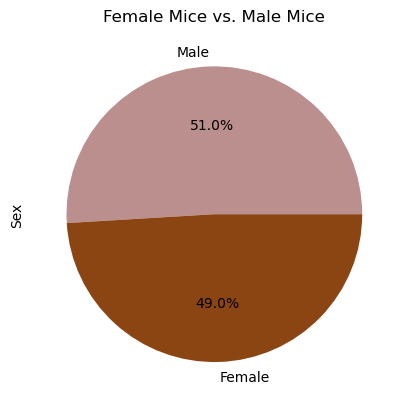

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.79, 50.20]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%", colors =['rosybrown', 'saddlebrown'])
plt.ylabel('Sex')
plt.title("Female Mice vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

each_mouse = Combined_data.groupby(['Mouse ID'])['Timepoint'].max()
mouse_reset = each_mouse.reset_index()

mouse_merge_df = mouse_reset[['Mouse ID','Timepoint']].\
    merge(Combined_data, on=['Mouse ID', 'Timepoint'], how="left")
mouse_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Filter the data for selected drug treatments
drugs_df = mouse_merge_df[mouse_merge_df["Drug Regimen"].isin(drug_treatments)]

#Create empty list to store the drug treatment data
drugs_list = []

#Loop over the drug treatments and store the tumor volume data
for drug in drug_treatments:
    
    #Filter the data for the current drug treatment
    tumor_size = drugs_df.loc[drugs_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    #Calculate and print quartiles
    quartiles = tumor_size.quantile([.25,.5,.75]).round(3)
    lowerq = quartiles[0.25].round(3)
    upperq = quartiles[0.75].round(3)
    iqr = round(upperq-lowerq, 3)
    lower_bound = round(lowerq - (1.5*iqr),3)
    upper_bound = round(upperq + (1.5*iqr),3)
    
    print(f"------------------------------------------------------------")                                                               
    print(f"The lower quartile of {drug} treament is: {lowerq}")                                            
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")                                                                                    
    
#Append the drug treatment data to the list
    drugs_list.append(tumor_size)   

------------------------------------------------------------
The lower quartile of Capomulin treament is: 32.377
The upper quartile of Capomulin treatments is: 40.159
The interquartile range of Capomulin treatments is: 7.782
Values below 20.704 could be Capomulin outliers.
Values above 51.832 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treament is: 31.56
The upper quartile of Ramicane treatments is: 40.659
The interquartile range of Ramicane treatments is: 9.099
Values below 17.911 could be Ramicane outliers.
Values above 54.308 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treament is: 54.049
The upper quartile of Infubinol treatments is: 65.526
The interquartile range of Infubinol treatments is: 11.477
Values below

<function matplotlib.pyplot.show(close=None, block=None)>

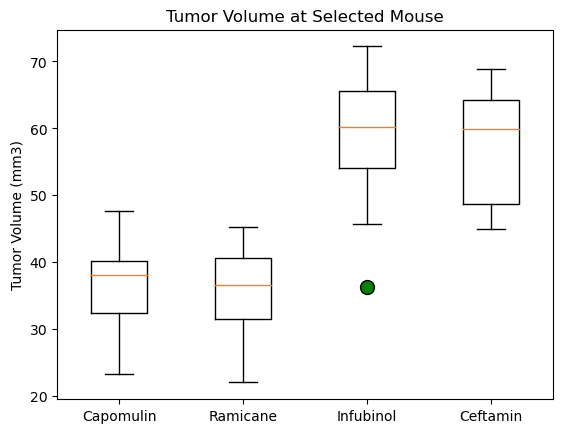

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
fig, ax = plt.subplots()
green_dot = dict(markerfacecolor = "green", markersize=10)
ax.boxplot(drugs_list, labels = drug_treatments, flierprops=green_dot)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Volume at Selected Mouse")

plt.show

## Line and Scatter Plots

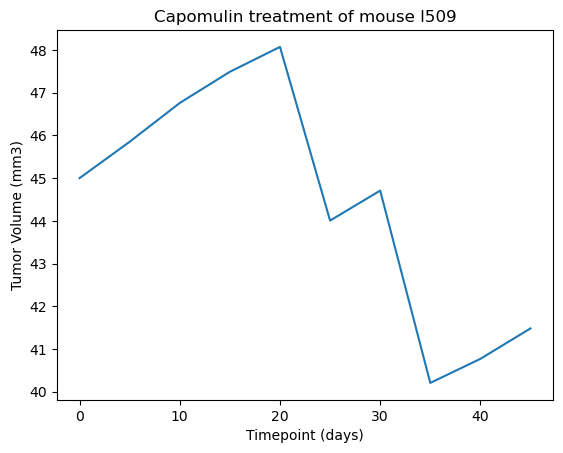

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_14310/4144681829.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouse_avg = scatter_df.groupby(['Mouse ID']).mean()


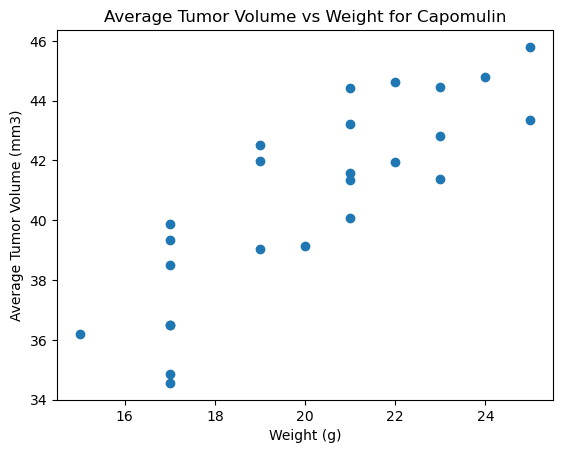

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
mouse_avg = scatter_df.groupby(['Mouse ID']).mean()

# Create scatter plot using Weight (g) as x-axis and Average Tumor Volume (mm3) as y-axis
plt.scatter(mouse_avg['Weight (g)'], mouse_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight for Capomulin')
plt.show()


## Correlation and Regression

The correlation between average mouse weight and average tumor volume is 0.84


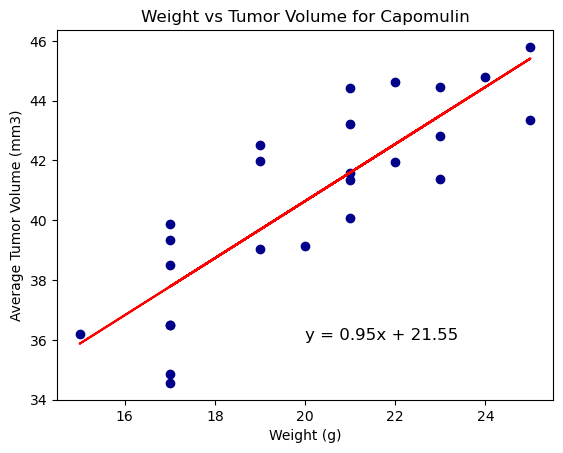

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_avg['Weight (g)'], mouse_avg['Tumor Volume (mm3)'])
print(f'The correlation between average mouse weight and average tumor volume is {round(correlation[0], 2)}')

# Linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_avg['Weight (g)'], mouse_avg['Tumor Volume (mm3)'])
line_equation = mouse_avg['Weight (g)'] * slope + intercept
show_line = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Scatterplot like above with line
plt.scatter(mouse_avg['Weight (g)'], mouse_avg['Tumor Volume (mm3)'], color='darkblue')
plt.plot(mouse_avg['Weight (g)'], line_equation, color='red')
plt.annotate(show_line, (20, 36), fontsize=12)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume for Capomulin')
plt.show()
